In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

## Importing Data set

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


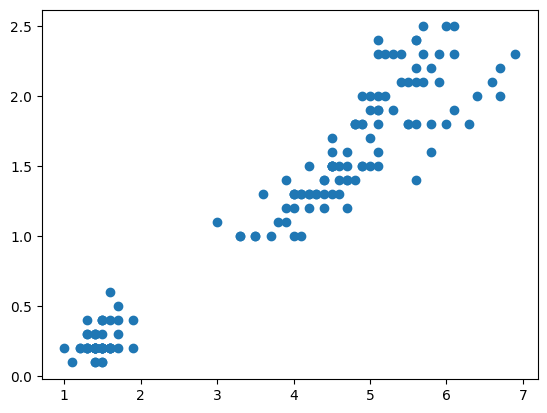

In [7]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.drop(columns = ['sepal length (cm)', 'sepal width (cm)'])
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
df

## Elbow Technique

In [8]:
k_range = (1, 21)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)

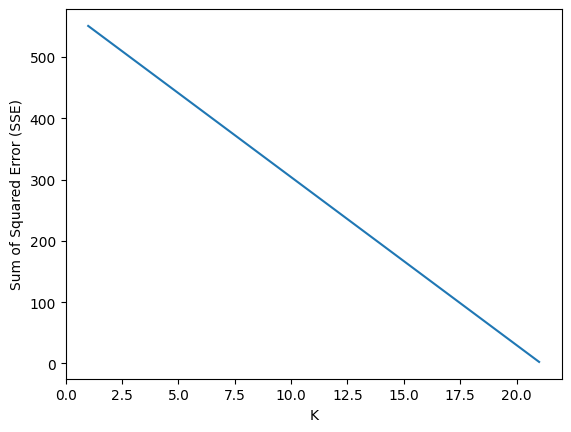

In [9]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_range, sse)

##### No Idea what K is suppoed to be, going to guess 2

##### Trying silhouette score to see if we can get a better visualization and get K

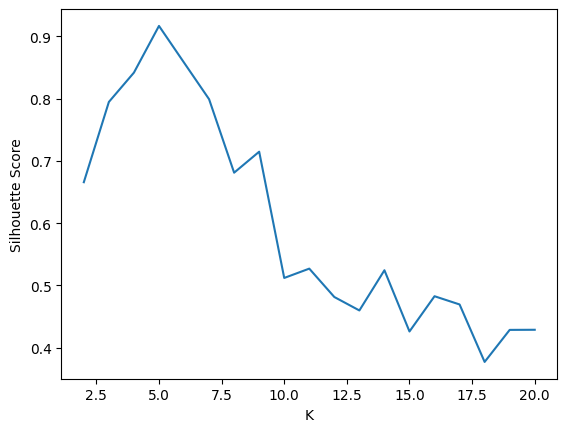

In [15]:
from sklearn.metrics import silhouette_score

k_range = range(2, 21)  # Starting from 2 instead of 1
sil_scores = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    labels = km.labels_
    sil_scores.append(silhouette_score(df, labels))

plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.plot(k_range, sil_scores)
plt.show()

##### K peaks at 5 so I suppose that's the optimal K

## Preprocessing

### Scaling

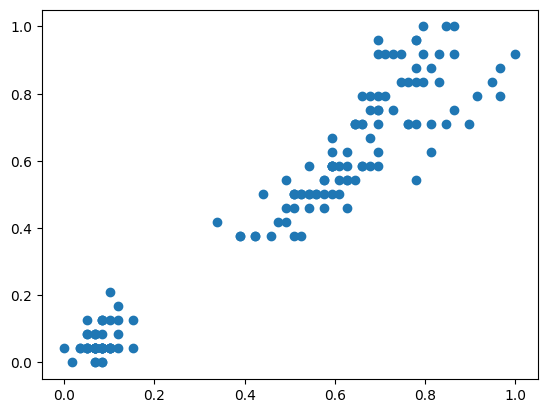

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

## Running Model

In [11]:
km = KMeans(n_clusters = 5)
y_predicted = km.fit_predict(df[['petal length (cm)' , 'petal width (cm)']])
df['clusters'] = y_predicted
df

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,1


### New plot with Centroids

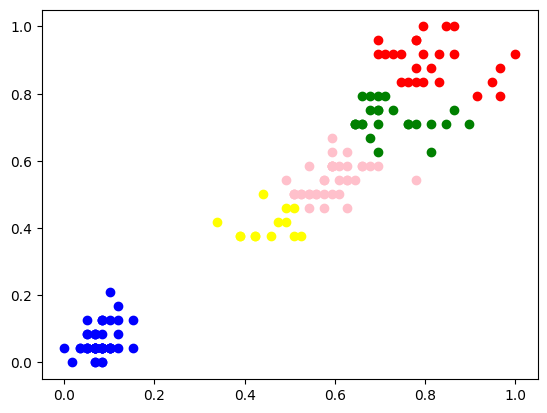

In [17]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]
df4 = df[df.clusters == 3]
df5 = df[df.clusters == 4]
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'], color='blue')
plt.scatter(df2['petal length (cm)'] , df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'] , df3['petal width (cm)'], color='green')
plt.scatter(df4['petal length (cm)'] , df4['petal width (cm)'], color='yellow')
plt.scatter(df5['petal length (cm)'] , df5['petal width (cm)'], color='pink')